In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gdpDataset = pd.read_csv("../../Datasets/GDP/GDP_HEALTH_per_country_clean.csv")
kaggleDataset = pd.read_csv("../../Datasets/Kaggle/covid_19_clean_complete_clean.csv")

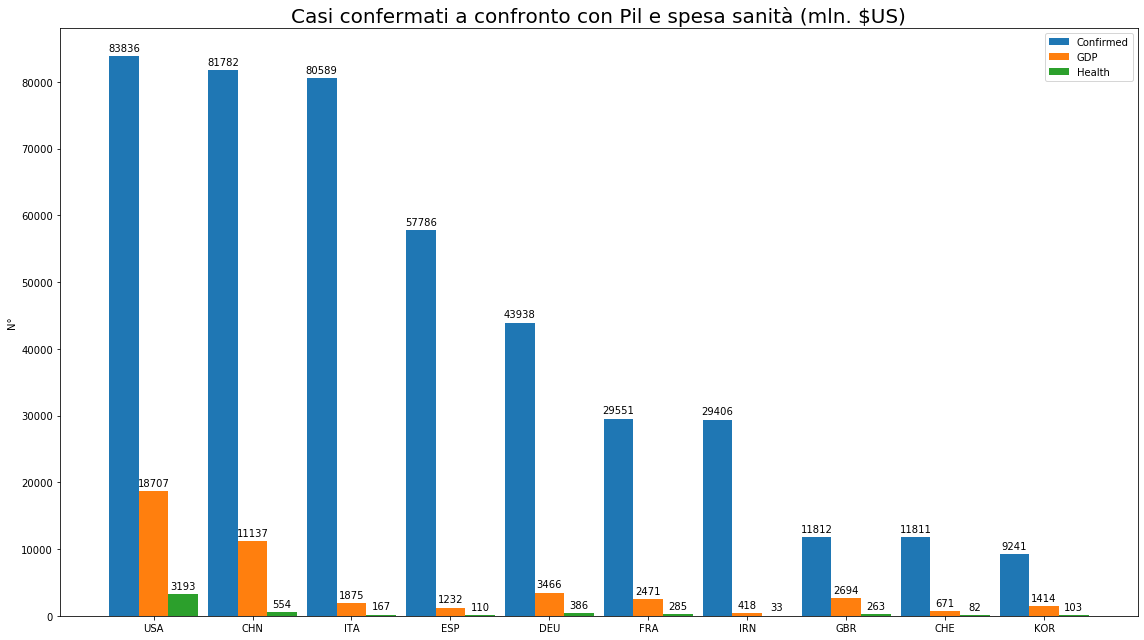

In [102]:
lastDay = kaggleDataset.sort_values(by=["Date"])["Date"].iloc[-1]

topTenInfection = kaggleDataset[kaggleDataset["Date"] == lastDay]
topTenInfection = topTenInfection.groupby(["Country/Region"])["Confirmed"].sum().nlargest(10)
topTenInfection = pd.DataFrame(topTenInfection)
topTenInfection.reset_index(inplace=True)
listC = topTenInfection["Country/Region"].tolist()

gdpDataset = gdpDataset[gdpDataset["Country Name"].isin(listC)]
resultingDF = gdpDataset.set_index("Country Name").join(topTenInfection.set_index("Country/Region")).sort_values(by=["Confirmed"], ascending=False)

labels = resultingDF["Country Code"].tolist()
confirmed = resultingDF["Confirmed"].tolist()
health = resultingDF["HEALTH 2016"].tolist()
healthReduced = []
for number in health:
    healthReduced.append(int(number / 1000000000))

gdp = resultingDF["GDP 2016"].tolist()
gdpReduced = []
for number in gdp:
    gdpReduced.append(int(number / 1000000000))
    
x = np.arange(len(labels))
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16,9))
axConfirmed = ax.bar(x - width, confirmed, width, label='Confirmed')
axGDP = ax.bar(x, gdpReduced, width, label='GDP')
axHealth = ax.bar(x + width, healthReduced, width, label='Health')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('N°')
ax.set_title('Casi confermati a confronto con Pil e spesa sanità (mln. $US)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(axConfirmed)
autolabel(axGDP)
autolabel(axHealth)

fig.tight_layout()

plt.show()